### PART-A:Sentiment Classification on Digital content and entertainment industry

• DOMAIN: Digital content and entertainment industry

• CONTEXT: The objective of this project is to build a text classification model that analyses the customer's sentiments based on their reviews in the IMDB database. The model uses a complex deep learning model to build an embedding layer followed by a classification algorithm to analyse the sentiment of the customers. 

• DATA DESCRIPTION: The Dataset of 50,000 movie reviews from IMDB, labelled by sentiment (positive/negative).Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, the words are indexed by their frequency in the dataset, meaning the for that has index 1 is the most frequent word. Use the first 20 words from each review to speed up training, using a max vocabulary size of 10,000. As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

• PROJECT OBJECTIVE: To Build a sequential NLP classifier which can use input text parameters to determine the
customer sentiments.

Command to import data: "from tensorflow.keras.datasets import imdb"

#### Import and analyse the data set

In [60]:
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Conv1D, GlobalMaxPool1D, LSTM, TimeDistributed, Flatten
from matplotlib import pyplot
from tensorflow.keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000, maxlen=300)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\Gayathri\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Gayathri\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you

###  data analysis

In [61]:
print(X_train.shape)
print(X_test.shape)
print(y_train)
print(y_test)

(19051,)
(19450,)
[1 0 0 ... 0 1 0]
[0 1 0 ... 0 0 0]


In [62]:
# Summarize number of Labels
print("Labels: ")
print(np.unique(y_train))

Labels: 
[0 1]


In [63]:
X_train_max_len = max(len(x) for x in X_train)
print("Max length of sequence in X_train: {}".format(X_train_max_len))

X_test_max_len = max(len(x) for x in X_test)
print("Max length of sequence in X_test:  {}".format(X_test_max_len))

Max length of sequence in X_train: 299
Max length of sequence in X_test:  299


### Padding each sentence to be of same length

Review length: 
Mean 159.68 words (60.730229)


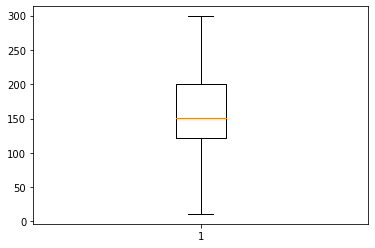

In [64]:
# Summarize review length
print("Review length: ")
result = [len(x) for x in X_train]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
pyplot.boxplot(result)
pyplot.show()

# we can see that max reviews are under the 500 characters mark

In [65]:
#padding to 300 length
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=300)
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=300)

#### Print shape of features & labels
###### Number of review, number of words in each review

In [66]:
# summarize size
# number of reviews
print("Number of reviews in x_train: {}".format(len(X_train)))
print("Number of reviews in x_test: {}".format(len(X_test)))
#print("Padded Training and Test data: ")
#print(len(X_train.shape))
#print(len(X_test.shape))

Number of reviews in x_train: 19051
Number of reviews in x_test: 19450


In [67]:
# number of words in each review
print("Number of words in each review is {0}".format(X_train_padded[0].shape[0]))

Number of words in each review is 300


In [68]:
y_train.shape

(19051,)

In [69]:
y_test.shape
print("Unique Labels: ")
print(np.unique(y_train))

Unique Labels: 
[0 1]


### Print value of any one feature and it's label
Feature value

In [70]:
print("Value of the 100th review:" ,X_train[100])

Value of the 100th review: [1, 14, 9, 6, 389, 20, 19, 6, 253, 1096, 65, 5, 4, 6891, 7, 1181, 3855, 5, 4, 620, 756, 7, 803, 674, 11, 113, 97, 14, 6, 55, 467, 2525, 20, 92, 387, 4, 2, 7, 4, 182, 2, 25, 39, 319, 14, 2065, 47, 389, 388, 5, 13, 594, 33, 4, 192, 15, 212, 9, 115, 2525, 88, 156, 40, 2065, 97, 170, 39, 486, 8, 622, 1801, 168, 6529, 776, 87, 20, 32, 187]


In [71]:
print("Sentiment Label:", y_train[100])

Sentiment Label: 1


##### Decoding the feature value to get original sentence

First, retrieve a dictionary that contains mapping of words to their index in the IMDB dataset

In [72]:
imdb_wordindex = imdb.get_word_index()

Now use the dictionary to get the original words from the encodings, for a particular sentence

In [73]:
index_from = 3
imdb_wordindex = {key:value + index_from for key, value in imdb_wordindex.items()}
imdb_wordindex['the']

4

In [74]:
inverted_word = {value: key for key, value in imdb_wordindex.items()}
[inverted_word[index] for index in X_train[100] if index > index_from]

['this',
 'is',
 'a',
 'wonderful',
 'movie',
 'with',
 'a',
 'fun',
 'clever',
 'story',
 'and',
 'the',
 'dynamics',
 'of',
 'culture',
 'differences',
 'and',
 'the',
 'running',
 'theme',
 'of',
 "what's",
 'important',
 'in',
 'life',
 'make',
 'this',
 'a',
 'very',
 'under',
 'appreciated',
 'movie',
 "don't",
 'let',
 'the',
 'of',
 'the',
 'world',
 'you',
 'from',
 'seeing',
 'this',
 'keaton',
 'has',
 'wonderful',
 'moments',
 'and',
 'i',
 'wonder',
 'at',
 'the',
 'fact',
 'that',
 'comedy',
 'is',
 'never',
 'appreciated',
 'because',
 'actors',
 'like',
 'keaton',
 'make',
 'going',
 'from',
 'humor',
 'to',
 'serious',
 'bits',
 'look',
 'tremendously',
 'easy',
 'great',
 'movie',
 'all',
 'around']

Get the sentiment for the above sentence

* positive (1)
* negative (0)

In [75]:
y_train[100]
# confirmed that the review is bad and the label also confirmed the same

1

##### Define Sequential model

In [76]:
vocabulary = 10000
max_words = 300

model = Sequential()
model.add(Embedding(vocabulary, 100, input_length=max_words))
model.add(LSTM(100,return_sequences= True))
dense_layer = Dense(100, activation='relu')
model.add(TimeDistributed(dense_layer))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [77]:
#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
#Print model summary
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 100)          1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 300, 100)          80400     
_________________________________________________________________
time_distributed (TimeDistri (None, 300, 100)          10100     
_________________________________________________________________
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 30001     
Total params: 1,120,501
Trainable params: 1,120,501
Non-trainable params: 0
_________________________________________________________________
None


In [78]:
#Fit the model
model.fit(X_train_padded, y_train, epochs=5, batch_size=64)

Epoch 1/5
298/298 [==============================] - 163s 456ms/step - loss: 0.4841 - accuracy: 0.7259
Epoch 2/5
298/298 [==============================] - 135s 451ms/step - loss: 0.1736 - accuracy: 0.9349
Epoch 3/5
298/298 [==============================] - 136s 456ms/step - loss: 0.0980 - accuracy: 0.9633
Epoch 4/5
298/298 [==============================] - 136s 458ms/step - loss: 0.0484 - accuracy: 0.9814
Epoch 5/5
298/298 [==============================] - 140s 469ms/step - loss: 0.0305 - accuracy: 0.9884


In [82]:
#Evaluating model
scores, accuracy = model.evaluate(X_test_padded, y_test, verbose=0)
print("Score: {:.4f}".format(scores))
print("Accuracy: {:.4f}".format(accuracy))

Score: 0.6023
Accuracy: 0.8713


In [83]:
#Predict on one sample
goodsample = "i liked the movie"
badsample = "i did not like this movie"

In [84]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
for review in [goodsample, badsample]:
    encoded_review = []
    review_split = review.split(" ")
    for word in review_split:
        encoded_review.append(imdb_wordindex[word])
    review_padded = pad_sequences([encoded_review], maxlen=300)
    pred = model.predict(review_padded)
    if pred > 0.5:
        sentiment = 'positive'
    else:
        sentiment = 'negative'
    print("Review: {0}\n\tSentiment: {1}".format(review, sentiment))

Review: i liked the movie
	Sentiment: positive
Review: i did not like this movie
	Sentiment: positive


### PART-B: Customer Sentiments on Social media analytics

* DOMAIN: Social media analytics

• CONTEXT: Past studies in Sarcasm Detection mostly make use of Twitter datasets collected using hashtag based supervision but such datasets are noisy in terms of labels and language. Furthermore, many tweets are replies to other tweets and detecting sarcasm in these requires the availability of contextual tweets.In this hands-on project, the goal is to build a model to detect whether a sentence is sarcastic or not, using Bidirectional LSTMs.

• DATA DESCRIPTION:
The dataset is collected from two news websites, theonion.com and huffingtonpost.com. This new dataset has the following advantages over the existing Twitter datasets:Since news headlines are written by professionals in a formal manner, there are no spelling mistakes and informal usage. This reduces the sparsity and also increases the chance of finding pre-trained embeddings.
Furthermore, since the sole purpose of TheOnion is to publish sarcastic news, we get high-quality labels with much less noise as compared to Twitter datasets. Unlike tweets that reply to other tweets, the news headlines obtained are self-contained. This would help us in teasing apart the real sarcastic elements

Content: Each record consists of three attributes:
is_sarcastic: 1 if the record is sarcastic otherwise 0
headline: the headline of the news article
article_link: link to the original news article. Useful in collecting supplementary data
 Reference: https://github.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection
 
• PROJECT OBJECTIVE: Build a sequential NLP classifier which can use input text parameters to determine the
customer sentiments

#### Import Libraries


In [85]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
import nltk
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten
from tensorflow.keras.callbacks import EarlyStopping


In [86]:
#!pip install bs4
from bs4 import BeautifulSoup

### Data EXploration

In [87]:
#Reading the dataset
df1 = pd.read_json("Sarcasm_Headlines_Dataset.json", lines=True)

In [88]:
# view the data
df1.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [89]:
# shape of the data
df1.shape

(28619, 3)

In [90]:
df1.columns

Index(['is_sarcastic', 'headline', 'article_link'], dtype='object')

#### Drop article_link from dataset
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [91]:
df1.drop('article_link', axis=1, inplace=True)

In [92]:
df1.columns

Index(['is_sarcastic', 'headline'], dtype='object')

There are 28619 rows and 3 columns

In [93]:
df1['is_sarcastic'].value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

* Non-sarcastic is more than sarcastic.There is an imbalance in data which may lead to skewness. 
So, need to normalize both the subset

In [94]:
sarcastic_headlines = df1.loc[df1['is_sarcastic']==1]
#undersample non sarcastic headlines
non_sarcastic_headlines = df1.loc[df1['is_sarcastic']==0].sample(n=13634,random_state=10)

In [95]:
sarcastic_headlines.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...
7,1,richard branson's global-warming donation near...
8,1,shadow government getting too large to meet in...


In [96]:
sarcastic_headlines.count()

is_sarcastic    13634
headline        13634
dtype: int64

In [97]:
non_sarcastic_headlines.head()

,is_sarcastic,headline
24185,0,"more than 130,000 vaccine doses reportedly des..."
27613,0,emeritus pope benedict to attend weekend's can...
21428,0,louis c.k. compares child molesting to eating ...
7090,0,does being neurotic really make you more creat...
21467,0,paul rudd celebrates kansas city royals' win b...


In [98]:
non_sarcastic_headlines.count()

is_sarcastic    13634
headline        13634
dtype: int64

In [99]:
balanced_headlines=pd.concat([sarcastic_headlines, non_sarcastic_headlines])

In [100]:
balanced_headlines['is_sarcastic'].value_counts()

1    13634
0    13634
Name: is_sarcastic, dtype: int64

In [101]:
balanced_headlines.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...
7,1,richard branson's global-warming donation near...
8,1,shadow government getting too large to meet in...


### Get the Length of each line and find the maximum length.
As different lines are of different length. We need to pad the our sequences using the max length.

In [102]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

### Text Cleaning

In [103]:
def clean_text(text, remove_stopwords=True):
  # Convert words to lower case
  text = text.lower()
  if True:
    text = text.split()
    new_text = []
    for word in text:
      if word in contractions:
        new_text.append(contractions[word])
      else:
        new_text.append(word)
      text = " ".join(new_text)
      text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
      text = re.sub(r'\<a href', ' ', text)
      text = re.sub(r'&amp;', '', text)
      text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
      text = re.sub(r'<br />', ' ', text)
      text = re.sub(r'\'', ' ', text)
      if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)
  return text

In [104]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gayathri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [105]:
# Clean the headlines
import re
from nltk.corpus import stopwords 
from pickle import dump, load

clean_balanced_headlines = []
for headline in balanced_headlines['headline']:
      clean_balanced_headlines.append(clean_text(headline, remove_stopwords=False))
print("balanced headlines are cleaned.")

balanced headlines are cleaned.


In [106]:
balanced_headlines['cleaned_headline']=clean_balanced_headlines

In [107]:
balanced_headlines.head()

,is_sarcastic,headline,cleaned_headline
0,1,thirtysomething scientists unveil doomsday clo...,thirtysomething scientists unveil doomsday clo...
3,1,inclement weather prevents liar from getting t...,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...,mother comes pretty close to using word strea...
7,1,richard branson's global-warming donation near...,richard branson s global warming donation near...
8,1,shadow government getting too large to meet in...,shadow government getting too large to meet in...


In [108]:
balanced_headlines.drop('headline', axis=1, inplace=True)

In [109]:
balanced_headlines.head()

,is_sarcastic,cleaned_headline
0,1,thirtysomething scientists unveil doomsday clo...
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word strea...
7,1,richard branson s global warming donation near...
8,1,shadow government getting too large to meet in...


#### Maximum Length:

In [110]:
print (balanced_headlines['cleaned_headline'][2])

eat your veggies  9 deliciously different recipes


In [111]:
len(balanced_headlines['cleaned_headline'][2].split())

7

In [112]:
max_length = max([len(headline.split()) for headline in balanced_headlines['cleaned_headline']])
print (max_length)

152


### Create features and labels

In [113]:
# splitting the data into training and testing data

from sklearn.model_selection import train_test_split
X = balanced_headlines['cleaned_headline'].values
y = balanced_headlines['is_sarcastic'].values
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

# checking the data split
print('sentiment Text: ', x_train[0])
print('sentiment: ', y_train[0])

sentiment Text:  son in iraq or something
sentiment:  1


In [114]:
# converting the strings into integers using Tokenizer 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 

# instantiating the tokenizer
max_vocab = 20000000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(x_train)

### Get vocabulary size

In [115]:
# checking the word index and find out the vocabulary of the dataset
wordidx = tokenizer.word_index
vocab_size = len(wordidx)+1
print('The size of datatset vocab is: ', vocab_size)

The size of datatset vocab is:  22054


### Get indices for words (using "word_index")

In [116]:
print(tokenizer.word_counts)
print(tokenizer.document_count)
print(tokenizer.word_index)
print(tokenizer.word_docs)

OrderedDict([('son', 97), ('in', 3068), ('iraq', 31), ('or', 148), ('something', 72), ('private', 29), ('vehicles', 2), ('beat', 24), ('ambulances', 1), ('saving', 19), ('gunshot', 2), ('and', 1312), ('stabbing', 8), ('victims', 46), ('53', 1), ('inch', 5), ('child', 149), ('thrown', 11), ('from', 889), ('roller', 6), ('coaster', 4), ('regrets', 13), ('nothing', 53), ('bernie', 56), ('sanders', 81), ('it', 947), ('would', 240), ('not', 1187), ('be', 626), ('a', 2056), ('bad', 95), ('thing', 106), ('if', 236), ('fbi', 54), ('director', 51), ('james', 70), ('comey', 26), ('resigned', 3), ('time', 336), ('warner', 10), ('ceo', 71), ('announces', 102), ('plans', 63), ('to', 6103), ('merge', 4), ('with', 1319), ('secretary', 53), ('corn', 9), ('lobby', 21), ('tightens', 3), ('the', 3587), ('screws', 1), ('rudest', 1), ('you', 806), ('can', 332), ('do', 299), ('on', 1747), ('first', 313), ('date', 49), ('here', 167), ('s', 3159), ('why', 335), ('college', 101), ('admissions', 5), ('process',

In [117]:
# converting tran and test sentences into sequences
train_seq = tokenizer.texts_to_sequences(x_train)
test_seq = tokenizer.texts_to_sequences(x_test)
print('Training sequence: ', train_seq[0])
print('Testing sequence: ', test_seq[0])

Training sequence:  [239, 5, 913, 141, 331]
Testing sequence:  [3088, 370, 168, 129, 249]


In [118]:
# padding the sequences to get equal length sequence because its conventional to use same size sequences
# padding the traing sequence
pad_train = pad_sequences(train_seq)
T = pad_train.shape[1]
print('The length of training sequence is: ', T)

# padding the test sequence
pad_test = pad_sequences(test_seq, maxlen=T)
print('The length of testing sequence is: ', pad_test.shape[1])

The length of training sequence is:  152
The length of testing sequence is:  152


### Word Embedding

##### Get Glove Word Embeddings


In [119]:
from zipfile import ZipFile
with ZipFile('glove.6B.zip', 'r') as z:
 z.extractall()
EMBEDDING_FILE = 'glove.6B.200d.txt'

In [120]:
#Get the Word Embeddings using Embedding file as given below
embeddings = {}
for o in open(EMBEDDING_FILE,encoding="utf8"):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd


### Create a weight matrix using GloVe embeddings

In [121]:
# Create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 200))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

### Modelling (Bidirectional LSTM model)

In [122]:
# building the model

from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, GlobalMaxPooling1D
from tensorflow.keras.models import Model

D = 20 
M = 15

i = Input (shape=(T, ))   
x = Embedding(vocab_size+1, D)(i)    # V+1 because the indexing of the words in vocab (V) start from 1 not 0
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(256, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i,x)

# compiling the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])
model.summary()




Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 152)]             0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 152, 20)           441100    
_________________________________________________________________
lstm_3 (LSTM)                (None, 152, 15)           2160      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 15)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               4096      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 447,613
Trainable params: 447,613
Non-trainable params: 0
_____________________________________________________

### Fit the model and check the validation accuracy 

In [123]:
# training the model
r = model.fit(pad_train, y_train, validation_data=(pad_test, y_test), epochs=2)

Epoch 1/2
597/597 [==============================] - 30s 47ms/step - loss: 0.4326 - accuracy: 0.7895 - val_loss: 0.3290 - val_accuracy: 0.8567
Epoch 2/2
597/597 [==============================] - 26s 44ms/step - loss: 0.2024 - accuracy: 0.9213 - val_loss: 0.3413 - val_accuracy: 0.8550


In [125]:
#Evaluating model
scores, accuracy = model.evaluate(pad_test, y_test, verbose=0)
print("Score: {:.4f}".format(scores))
print("Accuracy: {:.4f}".format(accuracy))

Score: 0.3413
Accuracy: 0.8550


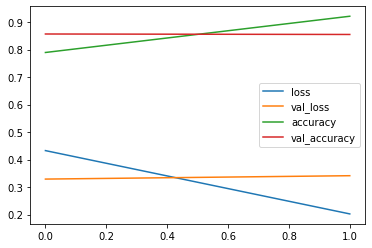

In [126]:
# Evaluating the model
import matplotlib.pyplot as plt

# plotting the loss and validation loss of the model
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

# plotting the accuracy and validation accuracy of the model
plt.plot(r.history['accuracy'], label= 'accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [127]:
# Predicting the sentiment of any text

def predict_sentiment(text):
  # preprocessing the given text 
  text_seq = tokenizer.texts_to_sequences(text)
  text_pad = pad_sequences(text_seq, maxlen=T)

  # predicting the class
  predicted_sentiment = model.predict(text_pad).round()

  if predicted_sentiment == 1.0:
    return(print('It is a positive sentiment'))
  else:
    return(print('It is a negative sentiment'))

In [128]:
text = ['i enjoyed ice cream']
predict_sentiment(text)

It is a positive sentiment


In [129]:
# saving the model for future purpose
model.save('sentiment analysis.h5')   # creates HDF5 file for model

### Summary
* We have read article headlines from huffpost and onion
* Balanced the data (Since there were lesser sarcastic news)
* Cleaned the data
* Generated word embeddings using glove 200d
* Built a simple bidirectional LSTM Model to detect and predict sarcastic news
* Overall Validation accuracy of the model is at 85.5 %